<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/07_cnn_bin_cats_and_dogs(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱신경망 컬러이미지 이진분류
- cats_vs_dogs datasets

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-01-02 05:33:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   136MB/s    in 0.5s    

2024-01-02 05:33:23 (136 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_root = '/content/cats_and_dogs_filtered'
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

In [ ]:
import os

# 파일명 리스트 획득

train_cats_fname = os.listdir(os.path.join(train_dir, 'cats'))
train_dogs_fname = os.listdir(os.path.join(train_dir, 'dogs'))

print('cats:', len(train_cats_fname))
print('dogs:', len(train_dogs_fname))

cats: 1000
dogs: 1000


- 레이블명

In [ ]:
class_name = ['cat', 'dog']

In [ ]:
import PIL

X_train = []
y_train = []

for i in range(len(train_cats_fname)):
    f = os.path.join(train_dir, 'cats', train_cats_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

In [ ]:
for i in range(len(train_dogs_fname)):
    f = os.path.join(train_dir, 'dogs', train_dogs_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

In [ ]:
samples = np.random.randint(1000, size=16)
samples

array([229, 173, 804, 639, 282, 708, 224, 361, 676, 215, 167, 128, 848,
       305, 900, 493])

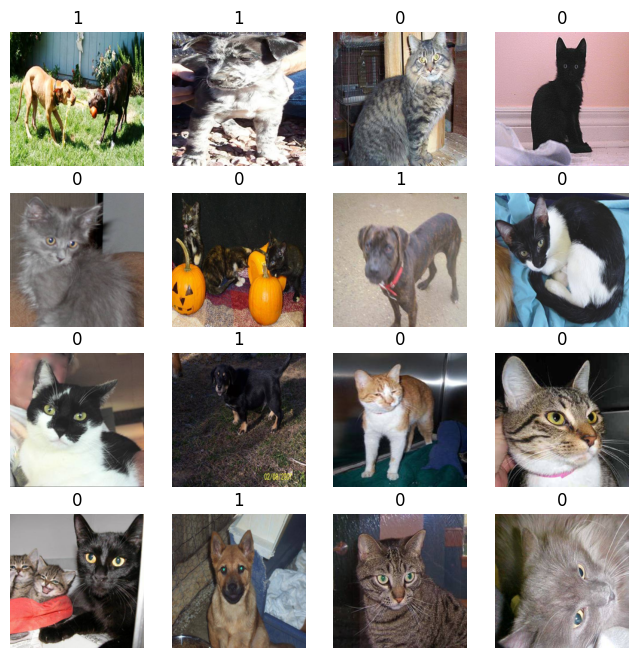

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

In [ ]:
type(X_train)

list

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((819, 224, 224, 3), (205, 224, 224, 3), (819,), (205,))

In [ ]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)


y_train_o[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train_s.shape

(819, 224, 224, 3)

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)), # input_shape를 바꿈.
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax') # 출력 레이어를 2개로 수정
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 93312)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    verbose=1
)

Epoch 1/10
26/26 [==============================] - 38s 1s/step - loss: 1.2278 - accuracy: 0.5348 - val_loss: 0.6920 - val_accuracy: 0.5024
Epoch 2/10
26/26 [==============================] - 48s 2s/step - loss: 0.6253 - accuracy: 0.6447 - val_loss: 0.6395 - val_accuracy: 0.6195
Epoch 3/10
26/26 [==============================] - 34s 1s/step - loss: 0.5503 - accuracy: 0.7253 - val_loss: 0.7467 - val_accuracy: 0.5610
Epoch 4/10
26/26 [==============================] - 37s 1s/step - loss: 0.4816 - accuracy: 0.7753 - val_loss: 0.6574 - val_accuracy: 0.6634
Epoch 5/10
26/26 [==============================] - 33s 1s/step - loss: 0.3255 - accuracy: 0.8913 - val_loss: 0.6725 - val_accuracy: 0.6439
Epoch 6/10
26/26 [==============================] - 37s 1s/step - loss: 0.2198 - accuracy: 0.9255 - val_loss: 0.7983 - val_accuracy: 0.6098
Epoch 7/10
26/26 [==============================] - 36s 1s/step - loss: 0.1395 - accuracy: 0.9719 - val_loss: 0.8732 - val_accuracy: 0.6341
Epoch 8/10
26/26 [==

In [ ]:
def create_model_01():
  model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
  ])

  return model

In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    verbose=1
)

Epoch 1/10
26/26 [==============================] - 39s 1s/step - loss: 1.9388 - accuracy: 0.4811 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 2/10
26/26 [==============================] - 38s 1s/step - loss: 0.6897 - accuracy: 0.5287 - val_loss: 0.6923 - val_accuracy: 0.5024
Epoch 3/10
26/26 [==============================] - 44s 2s/step - loss: 0.6869 - accuracy: 0.5372 - val_loss: 0.6924 - val_accuracy: 0.5024
Epoch 4/10
26/26 [==============================] - 38s 1s/step - loss: 0.6742 - accuracy: 0.5617 - val_loss: 0.6864 - val_accuracy: 0.5610
Epoch 5/10
26/26 [==============================] - 44s 2s/step - loss: 0.6617 - accuracy: 0.5897 - val_loss: 0.6760 - val_accuracy: 0.6244
Epoch 6/10
26/26 [==============================] - 36s 1s/step - loss: 0.6523 - accuracy: 0.5983 - val_loss: 0.6723 - val_accuracy: 0.6000
Epoch 7/10
26/26 [==============================] - 38s 1s/step - loss: 0.6215 - accuracy: 0.6410 - val_loss: 0.6710 - val_accuracy: 0.6146
Epoch 8/10
26/26 [==

In [ ]:
from keras import callbacks

ckpt_path = './ckpt/cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=True,
    verbose=1
)


In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 40
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ckpt_callback],
    verbose=1
)

Epoch 1/40
26/26 [==============================] - ETA: 0s - loss: 2.1287 - accuracy: 0.4982
Epoch 1: val_loss did not improve from 0.63329
26/26 [==============================] - 40s 1s/step - loss: 2.1287 - accuracy: 0.4982 - val_loss: 0.6926 - val_accuracy: 0.5073
Epoch 2/40
26/26 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5397
Epoch 2: val_loss did not improve from 0.63329
26/26 [==============================] - 39s 1s/step - loss: 0.6899 - accuracy: 0.5397 - val_loss: 0.6907 - val_accuracy: 0.5024
Epoch 3/40
26/26 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.5604
Epoch 3: val_loss did not improve from 0.63329
26/26 [==============================] - 37s 1s/step - loss: 0.6818 - accuracy: 0.5604 - val_loss: 0.6912 - val_accuracy: 0.4976
Epoch 4/40
26/26 [==============================] - ETA: 0s - loss: 0.6525 - accuracy: 0.6142
Epoch 4: val_loss did not improve from 0.63329
26/26 [==============================] - 39s 1s/s

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

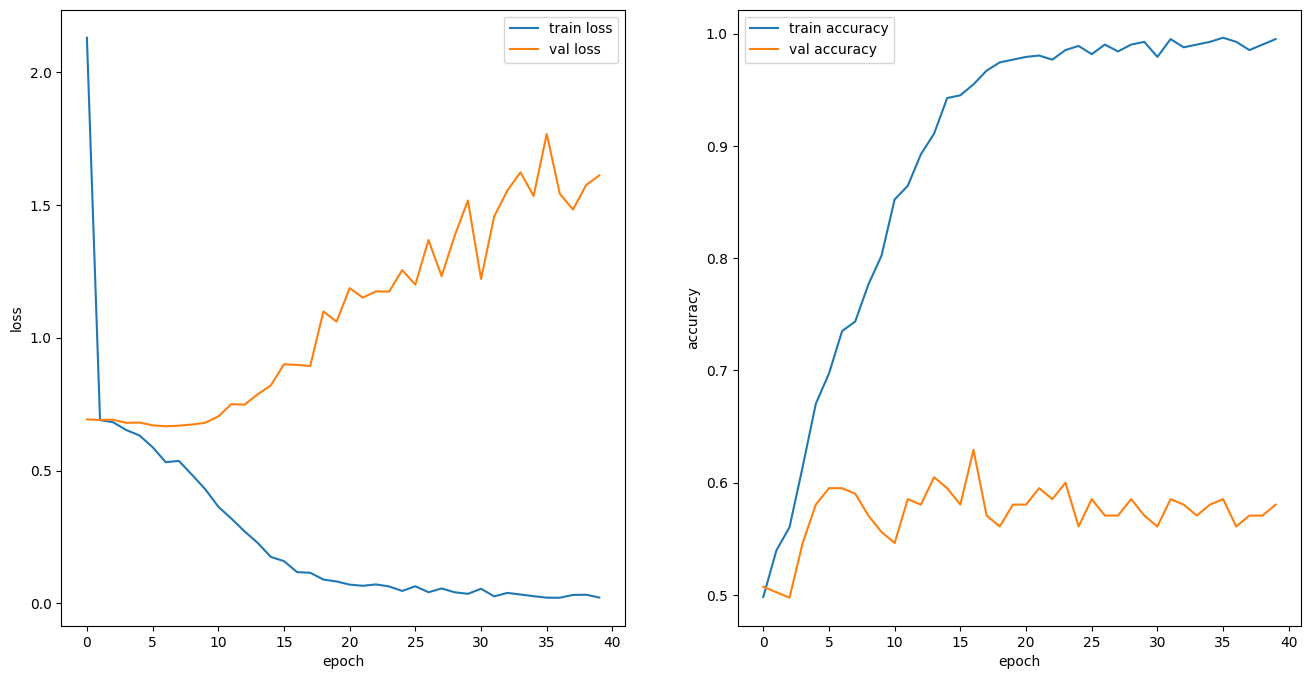

In [ ]:
plot_history(history)

In [ ]:
# 저장되어있는 최선의 가중치를 모델에 업로드

model.load_weights(ckpt_path)